In [ ]:
from kivy.app import App
from kivy.core.window import Window
from kivy.uix.gridlayout import GridLayout
from kivy.uix.button import Button
from kivy.uix.boxlayout import BoxLayout
from kivy.uix.label import Label
from kivy.config import Config


Window.clearcolor = (.96, .96, .96, 1)


Config.set('graphics', 'height', '400')
Config.set('graphics', 'width', '300')
Config.set('graphics', 'resizable', '0')
Config.set('kivy' , 'window_icon' , 'calculator.png')
Config.write()


main_label = Label(size_hint=[1, .2], text_size=[275, 0], halign='right' , color=[0,0,0,1] , font_size=24)

class Calculator(BoxLayout):

	def backward(self, express):
		if express:
			self.display.text = express[:-1]

	def calculate(self, express):
		if not express: return

		try:
			self.display.text = str( eval(express) )
		except Exception:
			self.display.text = 'error'

class CalculatorApp(App):
		def build(self):
				self.busy = False
				self.prev_value = 0
				self.current_value = 0
				self.opiration = ''
				self.additional_flag = False
				self.prev_target = None

				
				main_box_layout = BoxLayout(orientation='vertical'  )
				
				main_box_layout.add_widget(main_label)
				
				main_box_layout_child = BoxLayout(
						size_hint=[1, .8], orientation='vertical' , spacing=1)

				prevent_dict_btn = []
				
				dict_btn = [
						[self.dict_btn("C"), self.dict_btn("+/-"),self.dict_btn("%"), self.dict_btn("/")],
						[self.dict_btn("7"), self.dict_btn("8"), self.dict_btn("9"), self.dict_btn("x")],
						[self.dict_btn("4"), self.dict_btn("5"), self.dict_btn("6"), self.dict_btn("-")],
						[self.dict_btn("1"), self.dict_btn("2"), self.dict_btn("3"), self.dict_btn("+")],
						[self.dict_btn("0", [2, 1]), self.dict_btn("."), self.dict_btn("=")]
				]

				for x in range(len(dict_btn)):
						
						raw_box = BoxLayout(orientation='horizontal' , spacing=1)
						for var_btn in dict_btn[x]:
								btn = Button(text=var_btn.get('text'),background_normal='',font_size=24 ,background_color=var_btn.get('bg' , [1,1,1,1]), size_hint=var_btn.get('size_hint', [1, 1]), on_press=var_btn.get('on_press', self.default))
								prevent_dict_btn.append(btn)
								raw_box.add_widget(btn)
						
						main_box_layout_child.add_widget(raw_box)
				
				
				main_box_layout.add_widget(main_box_layout_child)

				return main_box_layout

		def decimal_click(self, instance):
				if self.busy and self.additional_flag:
					main_label.text = ''
					self.busy = False

				main_label.text += instance.text

				if self.prev_target:
					self.prev_target.background_color[3] = 1

		def math(self, instance):
				 
				self.set_current_value()

				if self.prev_target:
					self.prev_target.background_color[3] = 1	

				instance.background_color[3] *= 0.5	
	
				if not self.busy:
					self.check()	

				self.additional_flag = True

				if instance.text == 'C' :
					self.additional_flag = False
					main_label.text = ''

				if instance.text == '+/-' :
					self.additional_flag = False
					main_label.text = str(self.current_value * -1)

				if instance.text == '%' :
					self.additional_flag = False
					main_label.text = str(self.current_value * 0.01)	

				if instance.text == '.' :
					self.additional_flag = False
					if main_label.text.find('.') == -1:
						main_label.text += '.'		

				if instance.text == '+' :	
					self.opiration = '+'
				if instance.text == 'x' :
					self.opiration = 'x'
				if instance.text == '-' :
					self.opiration = '-'
				if instance.text == '/' :
					self.opiration = '/'
				if 	instance.text == '=' :
					if not self.busy:
						self.check()
					self.opiration = ''	

				self.set_current_value()
			
				self.prev_value = self.current_value

				self.prev_target = instance

				self.busy = True

		def default(self, instance):
				print('default')

		def dict_btn(self, text, size_hint=[1,1]):
				dict_btn = {'text' : text , 'size_hint' :size_hint }
				if text == '/' or text == 'x' or text == '-' or text == '=' or text == '+':
						dict_btn['bg'] = [.95, .61, .07, 1]
				elif text == '.' :
						dict_btn['bg'] = [0, 0, 0, 1]	
				else:
						dict_btn['bg'] = [.50, .55, .55, 1]		

				if text.isdecimal():
						dict_btn['bg'] = [0, 0, 0, 1]
						dict_btn['on_press'] = self.decimal_click					
				else:
						dict_btn['on_press'] = self.math

				return dict_btn
		def check(self) :
				if self.opiration == '+' :
					main_label.text = str(self.prev_value + self.current_value)
				elif self.opiration == 'x' :
					main_label.text = str(self.prev_value * self.current_value)
				elif self.opiration == '-' :
					main_label.text = str(self.prev_value - self.current_value)
				elif self.opiration == '/' :
					if self.current_value == 0:
						main_label.text = ''	
					else :
						main_label.text = str( self.prev_value / self.current_value)		

		def set_current_value(self):
			try:
				self.current_value = int(main_label.text)
			except ValueError:	
				if main_label.text == '':
					self.current_value = 0
				else:
					self.current_value = float(main_label.text)



CalculatorApp().run()

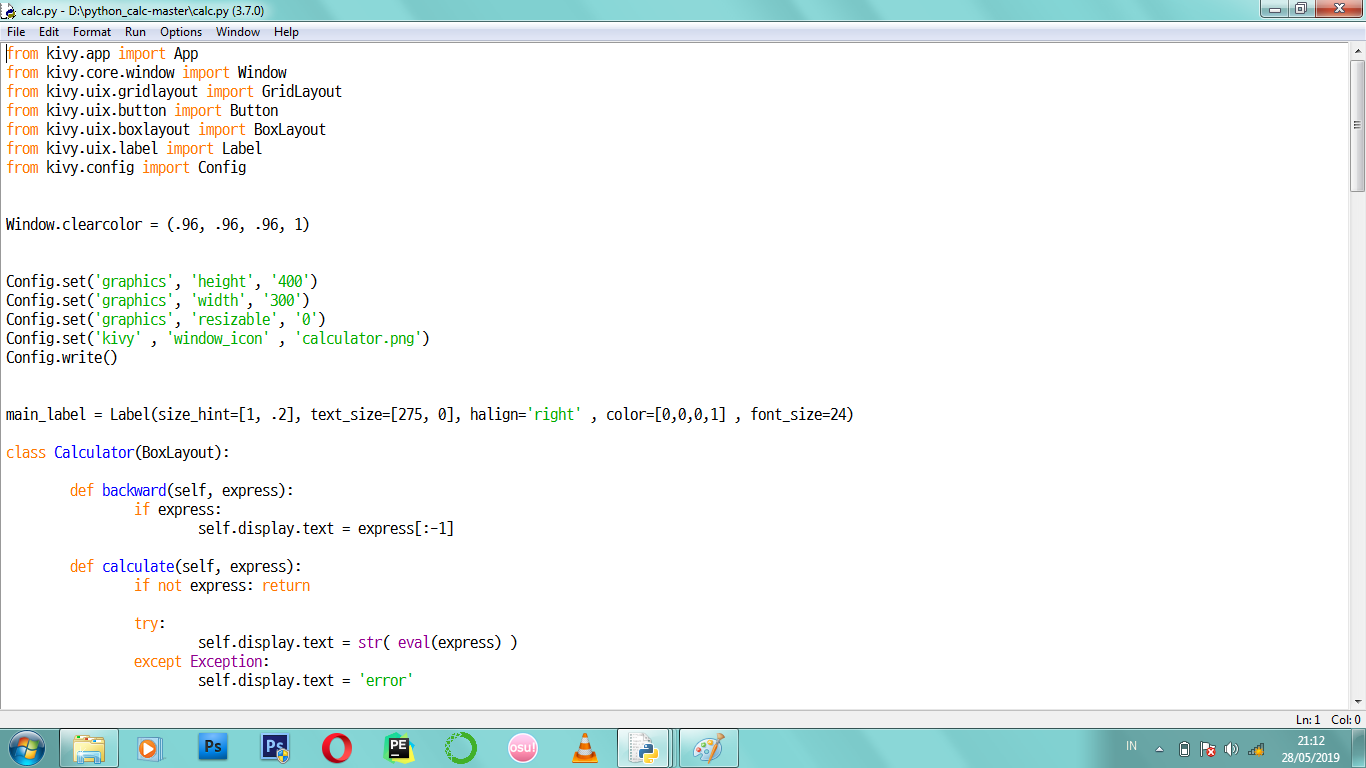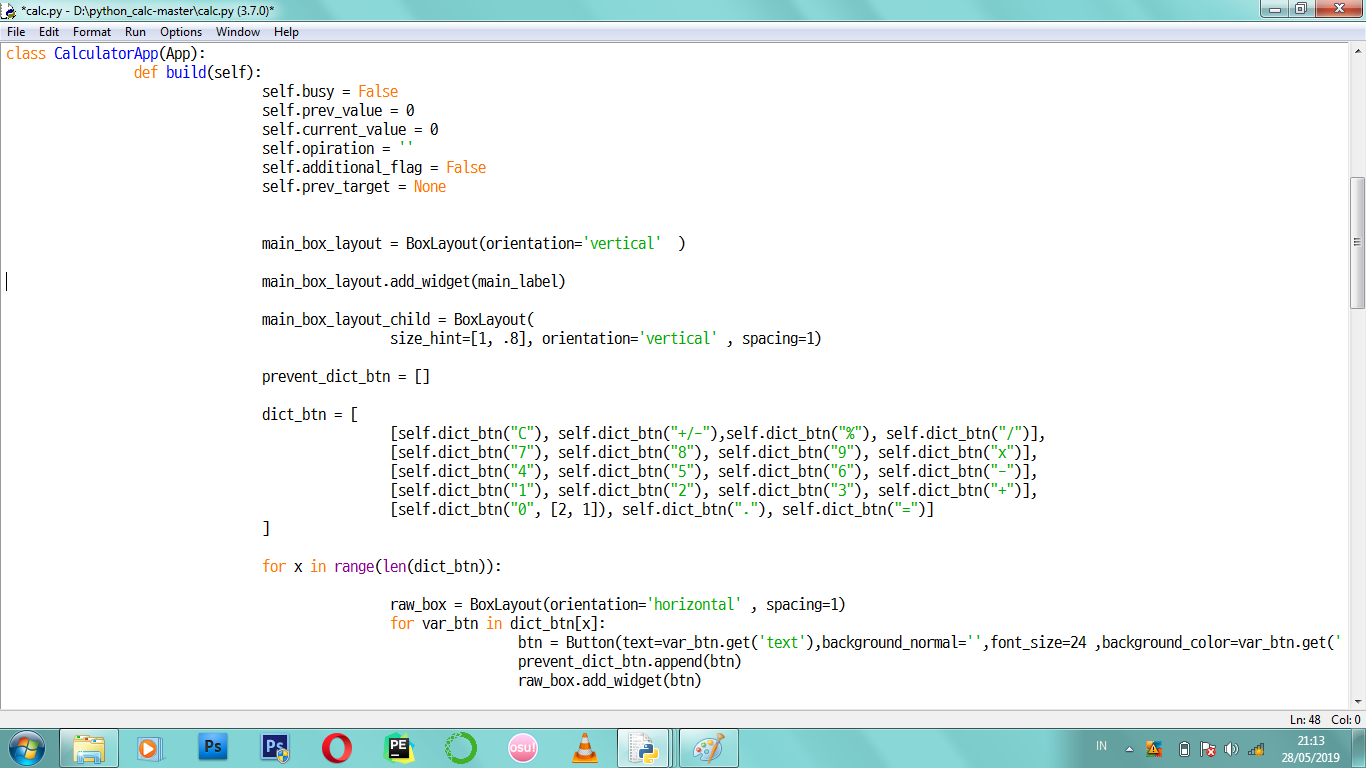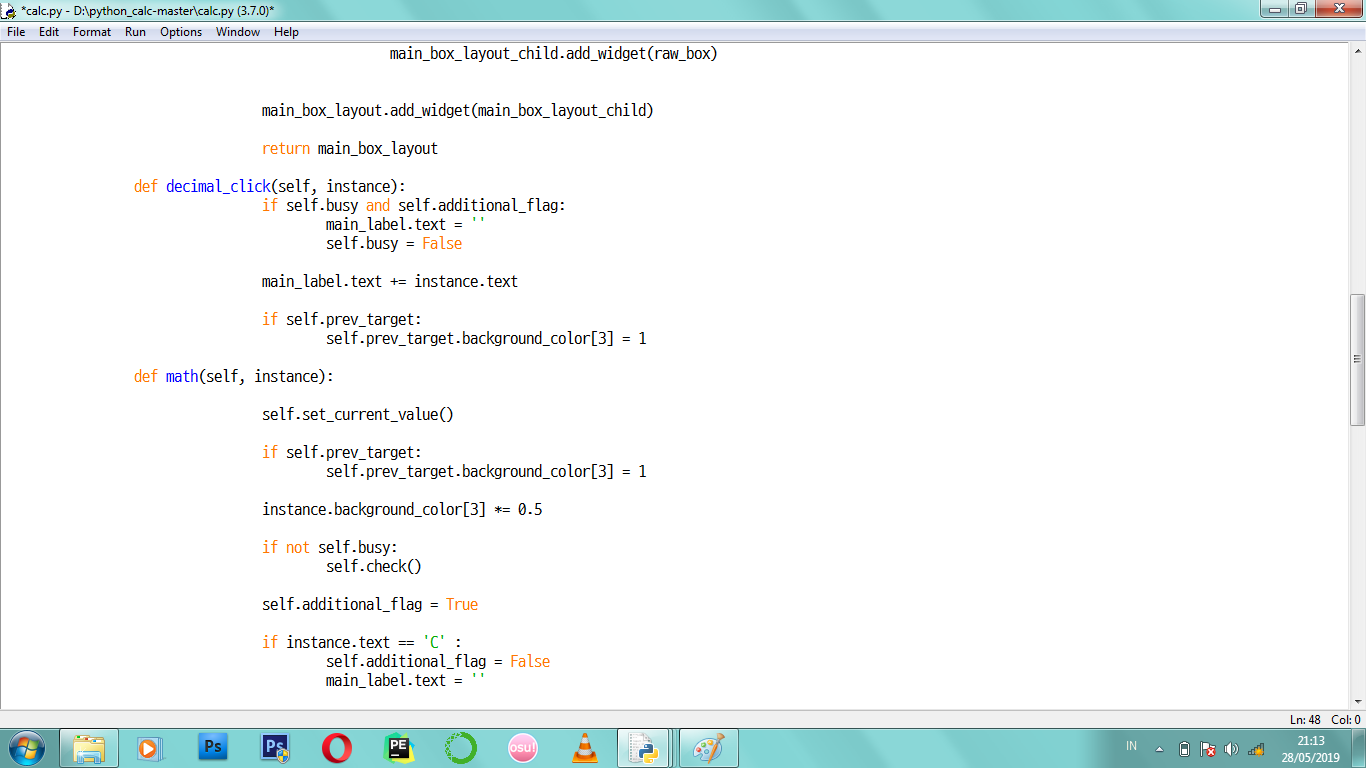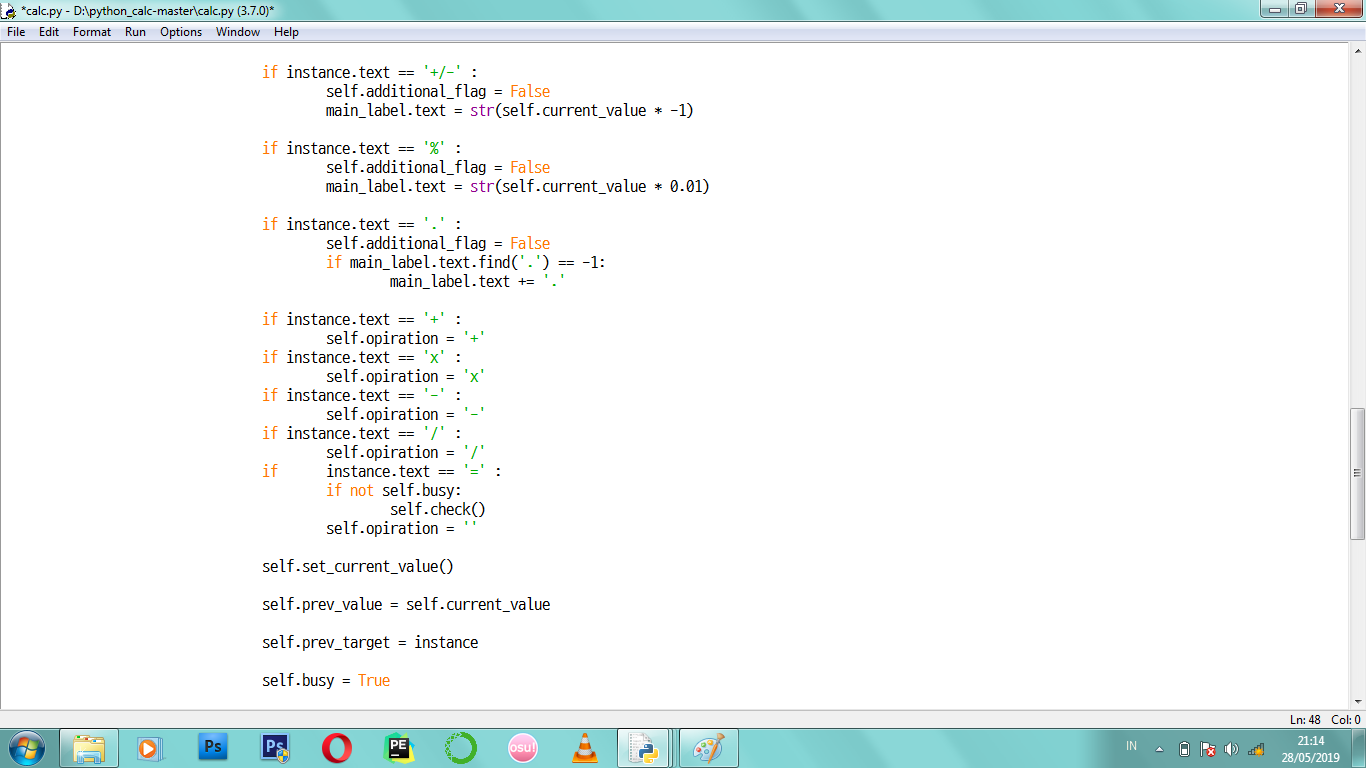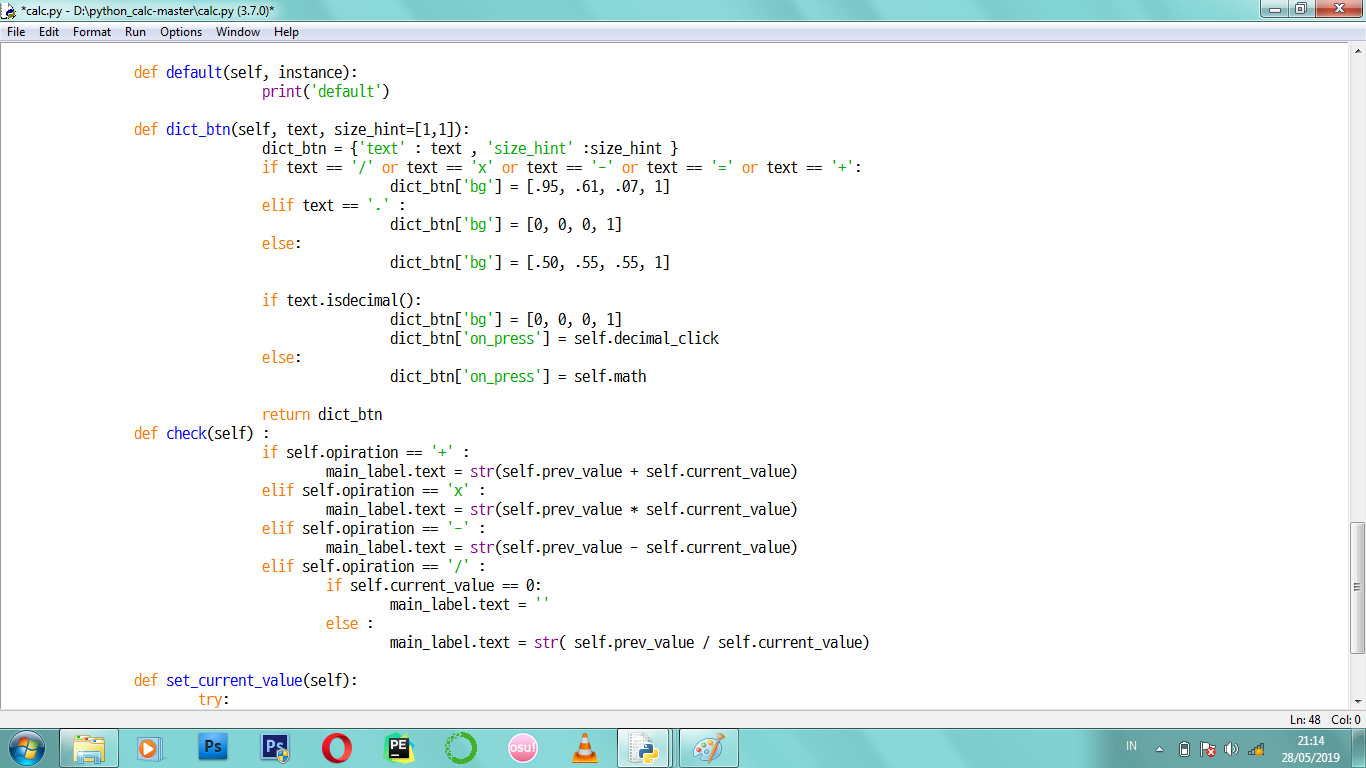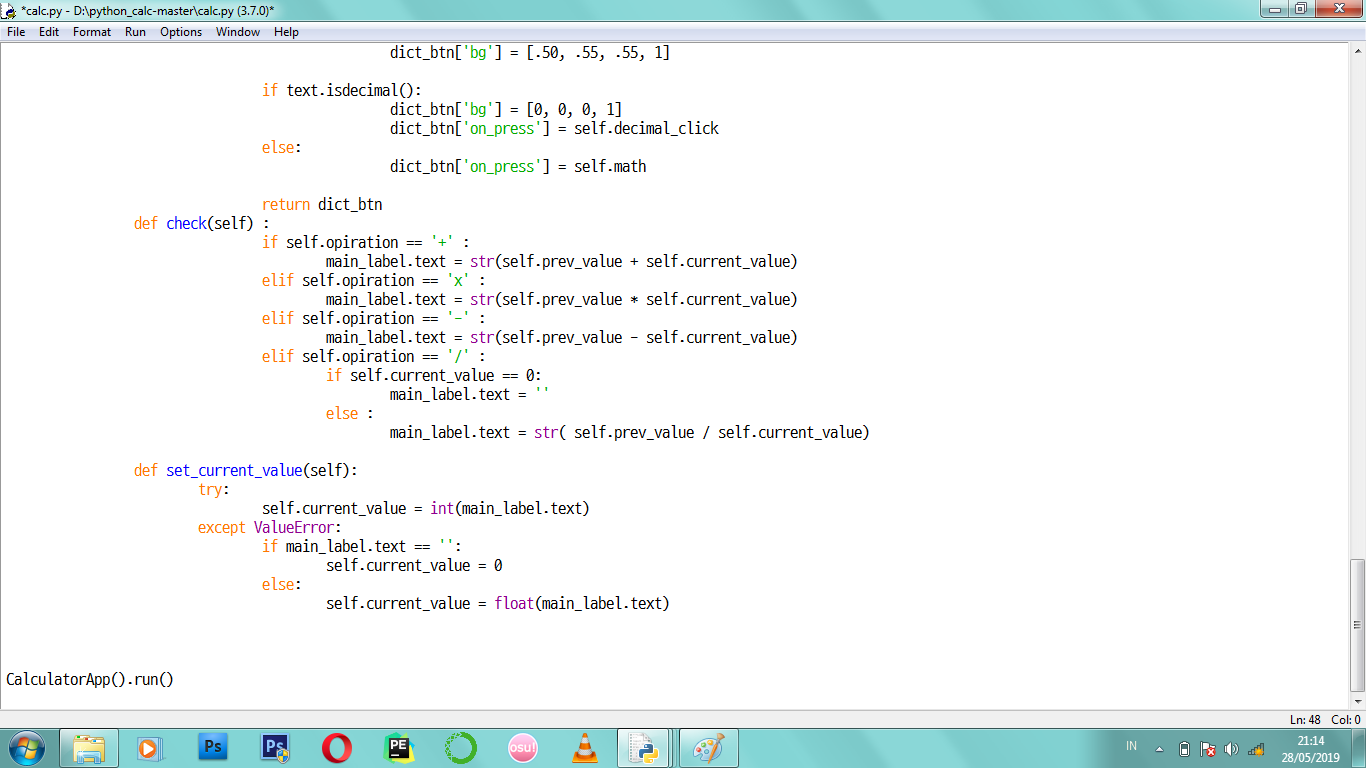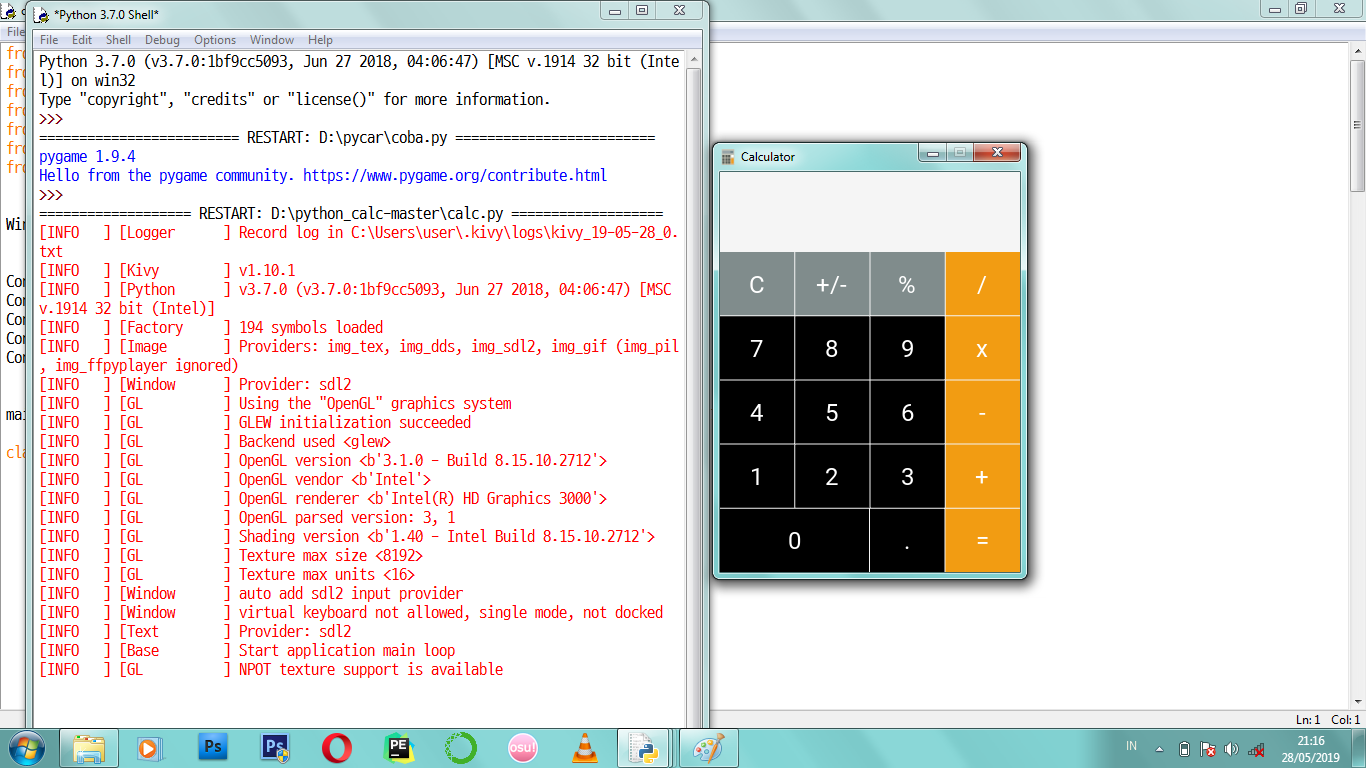

# PENGERTIAN KIVY

Kivy adalah GUI/NUI framework yang menggunakan bahasa pemrograman Python, dapat dijalankan pada Windows, Linux, OS X, Android dan iOS dengan menggunakan code yang sama dan menggunakan MIT license sehingga 100% free to use dan boleh dikomersialisasikan. Kivy didesain untuk membantu pembuatan dan pengembangan aplikasi cross-platform secara cepat.

# CARA INSTAL KIVY

1. Buka File python-3.msi
Setelah download selesai, kita akan mendapatkan file python-3.4.2.msi. File python-3.4.2.msi adalah file instalator python. File ini akan melakukan instalasi ke sistem windows.
Klik ganda untuk mengeksekusinya.
2. Pilih Pengguna
Pada tahapan ini kita akan diminta untuk memilih siapa saja yang boleh memakai python.
Pilih saja ‘Install for all users’ agar bisa dipakai untuk semua user di komputernya.
3. Lokasi Instalasi
Tentukan lokasi python akan diinstal. Biarkan saja di C:\python34\, kemudian klik next.
4. Kostumisasi
Pada tahapan ini, kita akan menentukan fitur-fitur yang akan diinstal.
Jangan lupa untuk mengaktifkan ‘Add python.exe to path’ agar perintah python dikenali pada CMD (Command Prompt).
5. Selesai…
Klik finish untuk menyelesaikan.

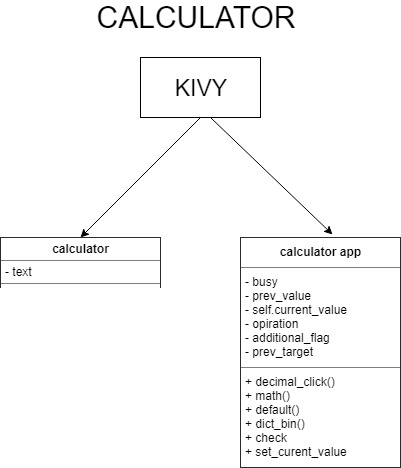

Global Variable:
- config.set untuk menampilkan lebar panjang dan icon aplikasi
- main_label untuk menentukan ukuran text, font size, dan warna

Method dan Class from kivy:
- box_layout
- add_widget
- box_layout_child
- text
- clearcolour

Class dan Method for Calculator:
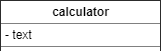
class calculator memiliki properti:
- text untuk menampilakan textnya

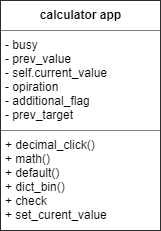
class calculatorApp memiliki properti:
- math() yaitu membuat rumus aritmatika
- check yaitu mengecek untuk rumus aritmatika
- desimal_click yaitu untuk penambahan tanda desimal
- set_current_value untuk label calculator

Object dan Class

Class adalah salah satu cara bagaimana kita membuat sebuah kode yang mempunyai behaviour tertentu dan lebih mudah dalam mengorganisasi berbagai fungsi dan state-nya. Dalam sebuah class kamu dapat menyimpan sebuah state tanpa harus membuat banyak state bila tidak menggunakan class.

In [ ]:
class Calculator(BoxLayout):

	def backward(self, express):
		if express:
			self.display.text = express[:-1]

	def calculate(self, express):
		if not express: return

		try:
			self.display.text = str( eval(express) )
		except Exception:
			self.display.text = 'error'

In [ ]:
class CalculatorApp(App):
		def build(self):
				self.busy = False
				self.prev_value = 0
				self.current_value = 0
				self.opiration = ''
				self.additional_flag = False
				self.prev_target = None

				
				main_box_layout = BoxLayout(orientation='vertical'  )
				
				main_box_layout.add_widget(main_label)
				
				main_box_layout_child = BoxLayout(
						size_hint=[1, .8], orientation='vertical' , spacing=1)

				prevent_dict_btn = []
				
				dict_btn = [
						[self.dict_btn("C"), self.dict_btn("+/-"),self.dict_btn("%"), self.dict_btn("/")],
						[self.dict_btn("7"), self.dict_btn("8"), self.dict_btn("9"), self.dict_btn("x")],
						[self.dict_btn("4"), self.dict_btn("5"), self.dict_btn("6"), self.dict_btn("-")],
						[self.dict_btn("1"), self.dict_btn("2"), self.dict_btn("3"), self.dict_btn("+")],
						[self.dict_btn("0", [2, 1]), self.dict_btn("."), self.dict_btn("=")]
				]

				for x in range(len(dict_btn)):
						
						raw_box = BoxLayout(orientation='horizontal' , spacing=1)
						for var_btn in dict_btn[x]:
								btn = Button(text=var_btn.get('text'),background_normal='',font_size=24 ,background_color=var_btn.get('bg' , [1,1,1,1]), size_hint=var_btn.get('size_hint', [1, 1]), on_press=var_btn.get('on_press', self.default))
								prevent_dict_btn.append(btn)
								raw_box.add_widget(btn)
						
						main_box_layout_child.add_widget(raw_box)
				
				
				main_box_layout.add_widget(main_box_layout_child)

				return main_box_layout

		def decimal_click(self, instance):
				if self.busy and self.additional_flag:
					main_label.text = ''
					self.busy = False

				main_label.text += instance.text

				if self.prev_target:
					self.prev_target.background_color[3] = 1

		def math(self, instance):
				 
				self.set_current_value()

				if self.prev_target:
					self.prev_target.background_color[3] = 1	

				instance.background_color[3] *= 0.5	
	
				if not self.busy:
					self.check()	

				self.additional_flag = True

				if instance.text == 'C' :
					self.additional_flag = False
					main_label.text = ''

				if instance.text == '+/-' :
					self.additional_flag = False
					main_label.text = str(self.current_value * -1)

				if instance.text == '%' :
					self.additional_flag = False
					main_label.text = str(self.current_value * 0.01)	

				if instance.text == '.' :
					self.additional_flag = False
					if main_label.text.find('.') == -1:
						main_label.text += '.'		

				if instance.text == '+' :	
					self.opiration = '+'
				if instance.text == 'x' :
					self.opiration = 'x'
				if instance.text == '-' :
					self.opiration = '-'
				if instance.text == '/' :
					self.opiration = '/'
				if 	instance.text == '=' :
					if not self.busy:
						self.check()
					self.opiration = ''	

				self.set_current_value()
			
				self.prev_value = self.current_value

				self.prev_target = instance

				self.busy = True

		def default(self, instance):
				print('default')

		def dict_btn(self, text, size_hint=[1,1]):
				dict_btn = {'text' : text , 'size_hint' :size_hint }
				if text == '/' or text == 'x' or text == '-' or text == '=' or text == '+':
						dict_btn['bg'] = [.95, .61, .07, 1]
				elif text == '.' :
						dict_btn['bg'] = [0, 0, 0, 1]	
				else:
						dict_btn['bg'] = [.50, .55, .55, 1]		

				if text.isdecimal():
						dict_btn['bg'] = [0, 0, 0, 1]
						dict_btn['on_press'] = self.decimal_click					
				else:
						dict_btn['on_press'] = self.math

				return dict_btn
		def check(self) :
				if self.opiration == '+' :
					main_label.text = str(self.prev_value + self.current_value)
				elif self.opiration == 'x' :
					main_label.text = str(self.prev_value * self.current_value)
				elif self.opiration == '-' :
					main_label.text = str(self.prev_value - self.current_value)
				elif self.opiration == '/' :
					if self.current_value == 0:
						main_label.text = ''	
					else :
						main_label.text = str( self.prev_value / self.current_value)		

		def set_current_value(self):
			try:
				self.current_value = int(main_label.text)
			except ValueError:	
				if main_label.text == '':
					self.current_value = 0
				else:
					self.current_value = float(main_label.text)

In [ ]:
Object merupakan bentuk nyata dari class, setiap object itu memiliki atribut dan method yang dimiliki oleh class nya

In [ ]:
CalculatorApp().run()